# C2: Determination of the Specific Rotation and Composition of a solution by a Polarimeter.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# specific rotation = 100*observed rotation / (concentration * path length)

concentration = np.array([
  0, 2, 4, 6, 8, 10
])

# original concentration = 10% (w/v) sucrose
concentration_with_respect_to_original = np.array([
  0, 20, 40, 60, 80, 100
])

observed_rotation = np.array([
  0, 3, 6.5, 9.5, 11.5, 15
])

In [29]:
def line(x, m, c):
    return m * x + c

def invline(y, m, c):
    return (y - c) / m

def least_squares(x, y):
    m = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x**2) - np.sum(x)**2)
    c = (np.sum(y) - m * np.sum(x)) / len(x)
    return m, c
  
m, c = least_squares(concentration, observed_rotation)
print(f"y = {m}x + {c}")

y = 1.4785714285714286x + 0.1904761904761898


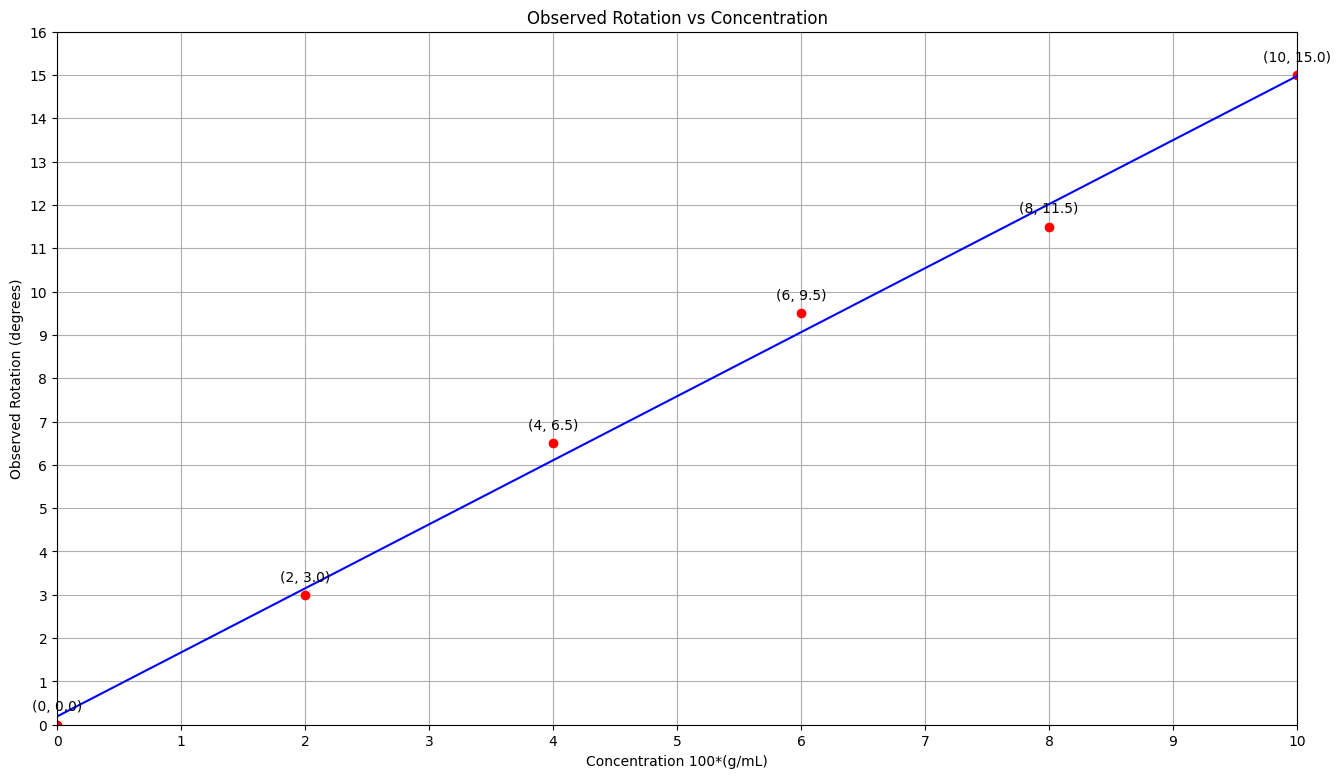

In [30]:
# graph plotting

plt.figure(figsize=(16, 9))

plt.plot(concentration, observed_rotation, 'ro')
plt.plot(concentration, line(concentration, m, c), 'b-')

plt.xlabel('Concentration 100*(g/mL)') 
plt.ylabel('Observed Rotation (degrees)')
plt.title('Observed Rotation vs Concentration')

for x, y in zip(concentration, observed_rotation):
  label = f"({x}, {y})"
  plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlim(0, 10)
plt.ylim(0, max(observed_rotation) + 1)

plt.xticks(np.arange(0, 11, 1)) 
plt.yticks(np.arange(0, max(observed_rotation) + 2, 1))

plt.grid(True)
plt.show()